<a href="https://colab.research.google.com/github/Almabette/HotelBookingAnalysis/blob/main/Copy_of_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

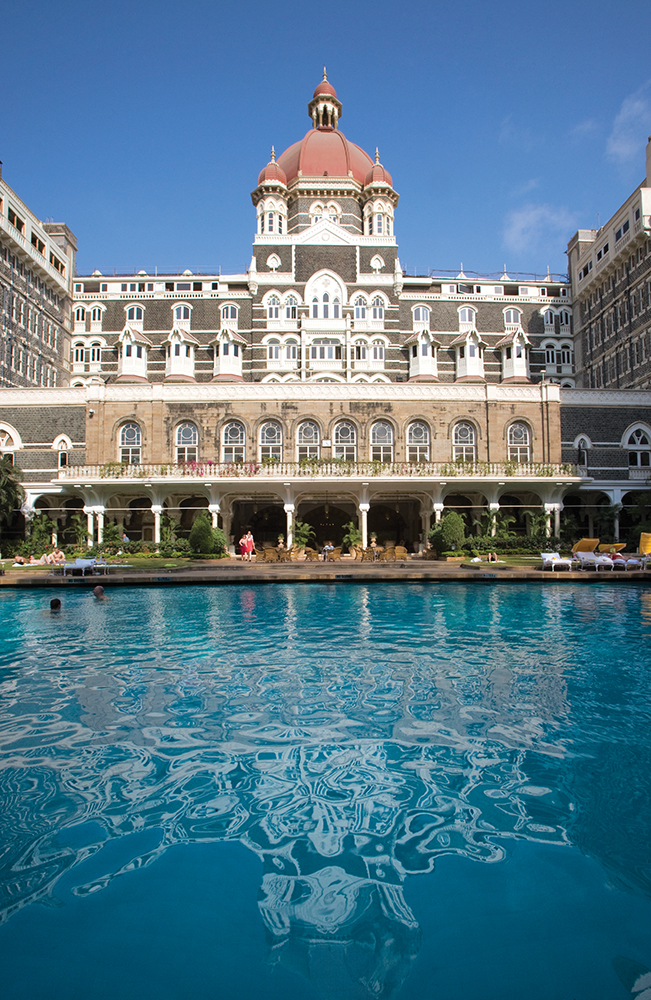

In [43]:
#importing the necessary libraries for analysing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [44]:
#connecting my drive to google colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#accessing/reading the hotel booking dataset
df=pd.read_csv('/content/drive/MyDrive/Almabetter/HotelBookings.csv')

In [47]:
#printing the dataframe
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [48]:
#studying the dataframe's observations, variables and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After loading the dataset we can see a number of things. These 32 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We can also see some missing values, which will require cleaning and handling of NaN values. 

### **Understanding, Wrangling and Cleaning Data**

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis.Side by side, explaining the process and results

**After** looking at the dataset we were able to notice some NaN values, therefore we need to examine missing values further before continuing with analysis


In [49]:
#finding out first which columns have null values
#using 'sum' function will show us how many nulls are found in each column of the dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this dataset, there are not too many columns with null(NaN) values, as we can see that children column has only 4 null values which we can replace with 0 because it's quite natural that those people didn't bring any child with them. And we can also see that country, agent and company have null values but these columns can not be dropped as we need these columns for our analysis. Instead, the null countries can be replaced with a string 'unknown'.      

In [50]:
#replacing the null values in children column with 0
df.fillna({'children':0},inplace=True)

In [51]:
#replacing null countries with 'unknown'
df.fillna({'country':'unknown'},inplace=True)

In [52]:
#checking again for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Now only agent and company columns are left which have null values, which will be dealt with later. 

**There** is a column on 1st index whose name is is_canceled which has only 2 values 0 meaning the booking is not cancelled and 1 meaning the booking is cancelled.  

In [53]:
#checking how many bookings are cancelled and how many are not cancelled
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

As we can see that 44224 bookings are cancelled, so we will not be using these 44224 rows for our analysis. Only not cancelled rows will be used for analysis.  

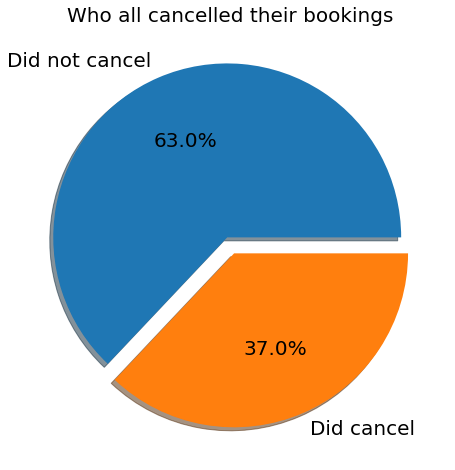

In [54]:
#showing cancelled and not cancelled bookings through a piechart
df['is_canceled'].value_counts().rename({0:'Did not cancel',1:'Did cancel'}).plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Who all cancelled their bookings',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

As our data cleaning comes to an end we will only be working on those rows where bookings are not cancelled and country is not unknown.

In [55]:
#obtaining a new dataframe which has cleaned data
df=df[(df['is_canceled']==0) & (df['country'] != 'unknown')]  

In [56]:
#checking the dataframe before starting analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74745 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74745 non-null  object 
 1   is_canceled                     74745 non-null  int64  
 2   lead_time                       74745 non-null  int64  
 3   arrival_date_year               74745 non-null  int64  
 4   arrival_date_month              74745 non-null  object 
 5   arrival_date_week_number        74745 non-null  int64  
 6   arrival_date_day_of_month       74745 non-null  int64  
 7   stays_in_weekend_nights         74745 non-null  int64  
 8   stays_in_week_nights            74745 non-null  int64  
 9   adults                          74745 non-null  int64  
 10  children                        74745 non-null  float64
 11  babies                          74745 non-null  int64  
 12  meal                           

In [57]:
#also checking the 'is_canceled' column
df['is_canceled'].value_counts()

0    74745
Name: is_canceled, dtype: int64

The data is now cleaned and we can start with our analysis

# **What is the best time of year to book a hotel room ?**


### **This question has two aspects-**

i) From customer's point of view- 

From customers point of view the best time to book a hotel room is when it is the cheapest i.e during off seasons, when not too many people book hotel rooms.

ii)From hotel's point of view-

From hotel's point of view the best time to book the hotel is during onn seasons i.e when too many people are booking rooms and the demand for rooms is high, at that time the hotel can charge high prices from customers, beacause the supply is same but the demand is relatively high.  

In [58]:
#import matplotlib inline
%matplotlib inline

In [62]:
#making a new column for month number
def month_number(month):
  if month=='January':
    return 1
  elif month=='February':
    return 2
  elif month=='March':
    return 3
  elif month=='April':
    return 4
  elif month=='May':
    return 5
  elif month=='June':
    return 6
  elif month=='July':
    return 7
  elif month=='August':
    return 8         
  elif month=='September':
    return 9
  elif month=='October':
    return 10
  elif month=='November':
    return 11     
  else:
    return 12  
df['month_number']=df['arrival_date_month'].apply(month_number)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=df.groupby('arrival_date_year')['month_number'].value_counts().unstack().fillna(0)

In [64]:
#viewing per month booking for each year
per_month_booking_for_each_year

month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,1504.0,2279.0,3006.0,3203.0,1834.0,1927.0
2016,1658.0,2521.0,3312.0,3345.0,3551.0,3185.0,3059.0,3230.0,3361.0,3664.0,2798.0,2438.0
2017,2410.0,2796.0,3279.0,3188.0,3551.0,3208.0,3329.0,3109.0,0.0,0.0,0.0,0.0


In [65]:
#storing the 2015 bookings in 2015's dataset
bookings_in2015=per_month_booking_for_each_year.iloc[0]

In [ ]:
#viewing 2015's dataset
bookings_in2015

month_number
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7     1504.0
8     2279.0
9     3006.0
10    3203.0
11    1834.0
12    1927.0
Name: 2015, dtype: float64

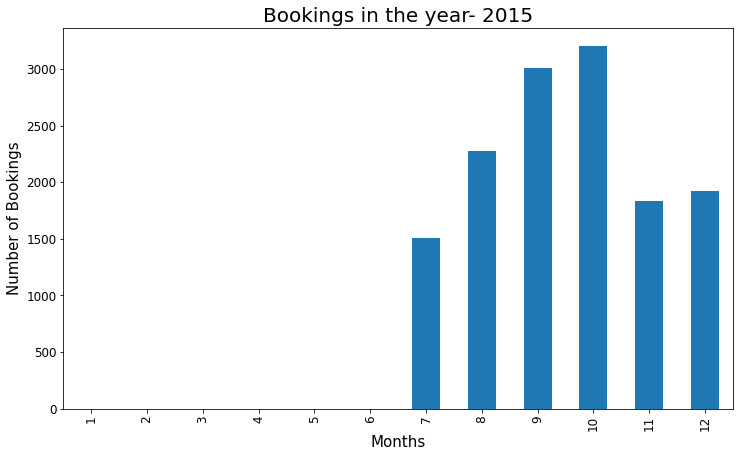

In [66]:
#plotting 2015's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2015.plot(kind='bar',fontsize=12)
plt.title('Bookings in the year- 2015',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2015-**
As we can see in 2015 there are no bookings before July i.e 7th month.
So,

i)From customer's point of view- 

The best time to book hotel room in 2015 is before July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for roms before july is zero or very low, and we all know that demand and price are directly proportional to each other.

ii)From hotel's point of view-

The best time to book hotel room in 2015 is after July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for rooms before July is zero or very low, and we all know that demand and price are directly proportional to each other. Hence, hotels can charge hight prices from customers during the period when demand for rooms is high i.e after July.


In [67]:
#storing the 2016's bookings in 2016's dataset
bookings_in2016=per_month_booking_for_each_year.iloc[1]

In [ ]:
#viewing 2016's dataset
bookings_in2016

month_number
1     1658.0
2     2521.0
3     3312.0
4     3345.0
5     3551.0
6     3185.0
7     3059.0
8     3230.0
9     3361.0
10    3664.0
11    2798.0
12    2438.0
Name: 2016, dtype: float64

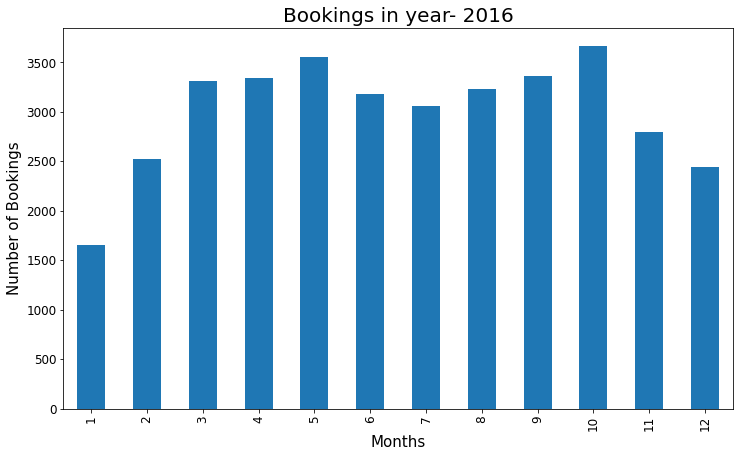

In [ ]:
#plotting 2016's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2016.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2016',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2016-**
As we can see in 2016 there are bookings in every month. So,

i)From customer's point of view-

The best time to book hotel room in 2016 is during 1st two and last 2 months of the year because these months have the least number of bookings throughout the year. Hence, the price for rooms during these months will be less compared to other months.  

ii)From hotel's point of view- 

The best time to book hotel room in 2016 is during 3rd-10th month of the year because these months have the ggod amount of bookings. Hence, the hotel can charge reatively high price from customers during these months.  


In [ ]:
#storing the 2017's bookings in 2017's dataset
bookings_in2017=per_month_booking_for_each_year.iloc[2]

In [ ]:
#viewing 2017's dataset
bookings_in2017

month_number
1     2410.0
2     2796.0
3     3279.0
4     3188.0
5     3551.0
6     3208.0
7     3329.0
8     3109.0
9        0.0
10       0.0
11       0.0
12       0.0
Name: 2017, dtype: float64

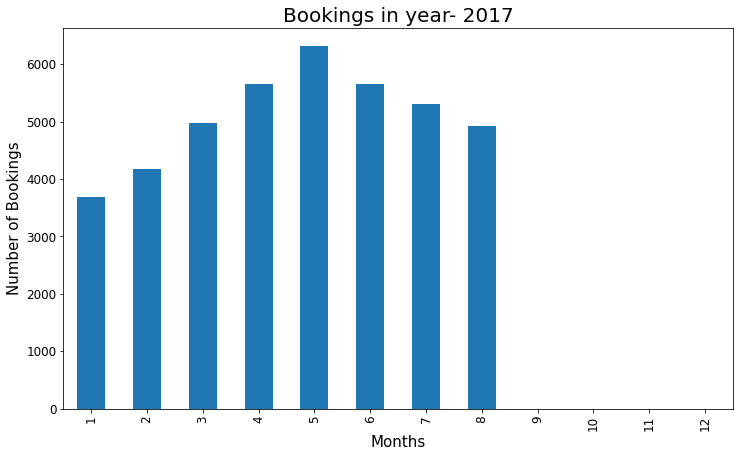

In [69]:
#plotting 2017's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2017.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2017',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2017-**
As we can see in 2017 there are no/less bookings after 8th month i.e August. So,

i)From customer's point of view-

The best time to book hotel room in 2017 is after August because there is not a single booking trafic after August compare to rest of the months of year 2017, which ultimately will give customer high probability to get discounted rates on hotel rooms.

ii)From hotel's point of view-

The best time to book hotel room in 2017 is till Month of August because till August, graph is denoting high amount of customer engagement which will enable the hotel to charge relatively high price from customers during this period.



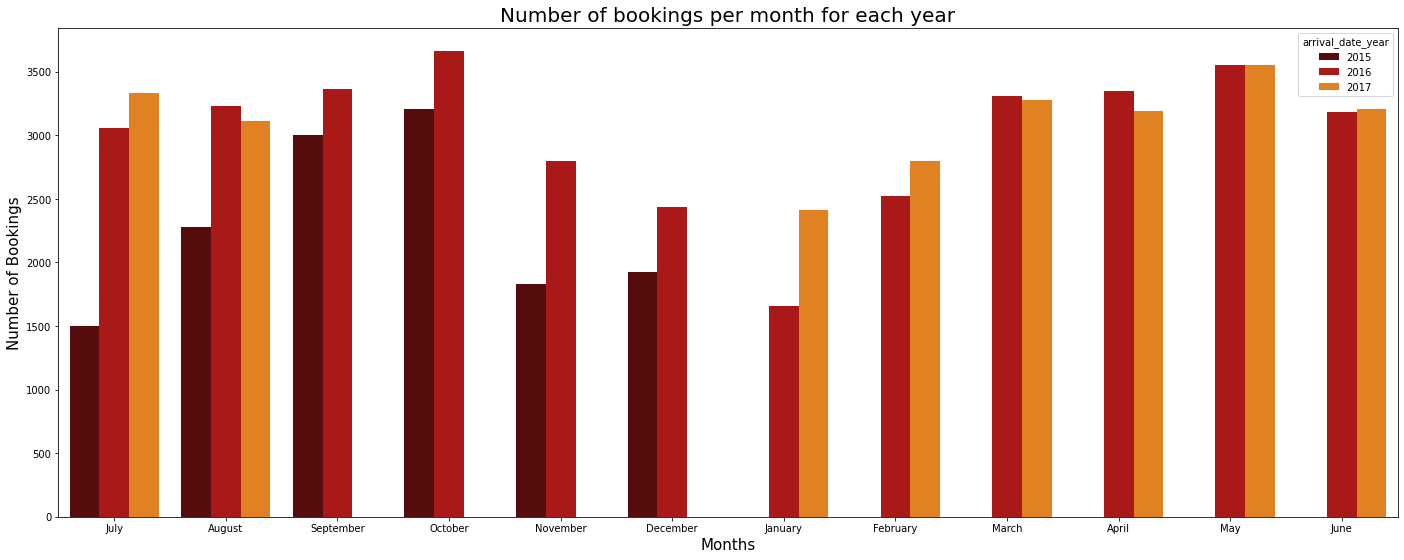

In [75]:
plt.figure(figsize=(24,9))
sns.countplot(x='arrival_date_month',data=df,hue='arrival_date_year',palette='gist_heat')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.title('Number of bookings per month for each year',fontsize=20)
plt.show()

In [ ]:
def month_as_numbers(arrival_date_month):
   month_as_numbers = 0
   if arrival_date_month ==  'January':
     month_as_numbers = 1
   elif arrival_date_month ==  'February':
     month_as_numbers = 2
   elif arrival_date_month ==  'March':
     month_as_numbers = 3
   elif arrival_date_month ==  'April':
     month_as_numbers = 4
   elif arrival_date_month ==  'May':
     month_as_numbers = 5
   elif arrival_date_month ==  'June':
     month_as_numbers = 6
   elif arrival_date_month ==  'July':
     month_as_numbers = 7
   elif arrival_date_month ==  'August':
     month_as_numbers = 8
   elif arrival_date_month ==  'September':
     month_as_numbers = 9
   elif arrival_date_month ==  'October':
     month_as_numbers = 10
   elif arrival_date_month ==  'November':
     month_as_numbers = 11  
   elif arrival_date_month ==  'December':
     month_as_numbers = 12   
   return  month_as_numbers

In [61]:
df['month_as_numbers'] = df.apply(lambda x: month_as_numbers(x['arrival_date_month']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=df.groupby('arrival_date_year')['month_as_numbers'].value_counts().unstack().fillna(0)

KeyError: ignored

In [ ]:
hotel_booking_year1 =df.groupby(['arrival_date_year',  'month_as_numbers'])['arrival_date_year'].count().unstack()

In [ ]:
#selected year of hotel booking
hotel_booking_year1

month_as_numbers,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,2776.0,3889.0,5114.0,4957.0,2340.0,2920.0
2016,2248.0,3891.0,4824.0,5428.0,5478.0,5292.0,4572.0,5063.0,5394.0,6203.0,4454.0,3860.0
2017,3681.0,4177.0,4970.0,5661.0,6313.0,5647.0,5313.0,4925.0,NaN,NaN,NaN,NaN


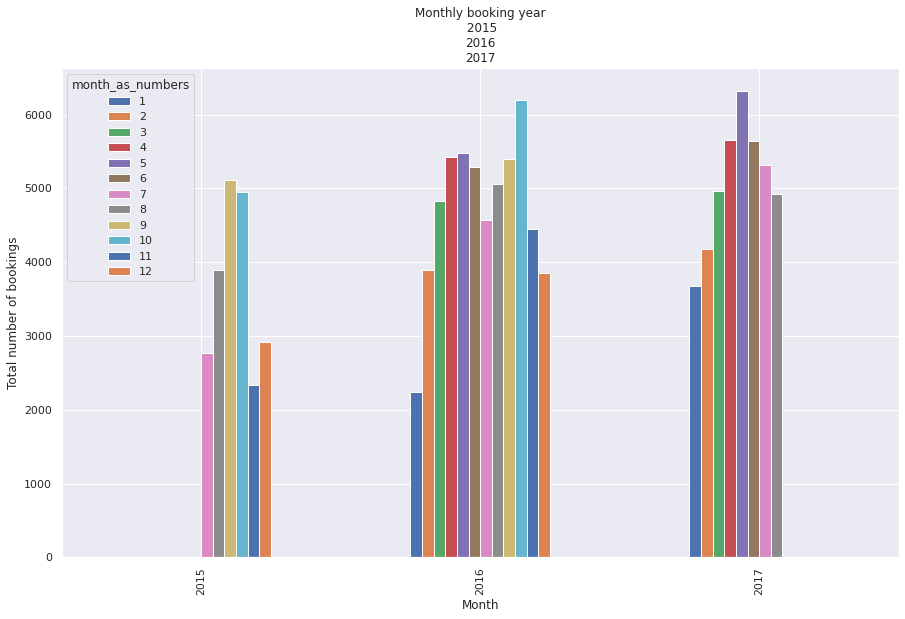

In [ ]:
#graphical Presentation of monthly booking in selected years
hotel_booking_year1.plot(kind='bar',  figsize=(15,9))
plt.title('Monthly booking year\n 2015\n2016\n2017')
plt.ylabel('Total number of bookings')
plt.xlabel('Month')
plt.show()

#Observation
In the above graph total number of bookins has been displayed monthwise for each year and he hightst bokkings happened in  year 2016  

In [ ]:
#Monthly Enagament of hotel booking
monthly_enagament=df['arrival_date_month'].value_counts()


In [ ]:
#use type of libraris
type(monthly_enagament)

pandas.core.series.Series

In [ ]:
#sorting
monthly_enagament.sort_index(inplace=True)

In [ ]:
monthly_enagament

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

In [ ]:
monthly_enagament.shape

(12,)

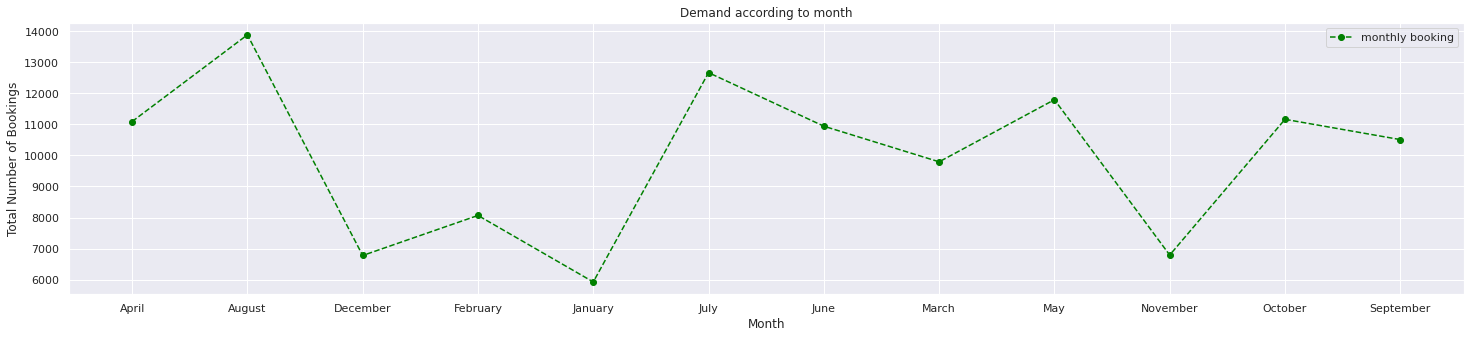

In [ ]:
#Graphical represtaion of Monthly changes in demand of hotel booking
plt.figure(figsize=(25,5))
plt.plot(monthly_enagament,
        color='green',
         marker='o',
         linestyle='dashed',
         label='monthly booking')
plt.title('Demand according to month')
plt.ylabel('Total Number of Bookings')
plt.xlabel('Month')
plt.legend()
plt.show()


#Problem
##what if you  wanted predictwhether or not a hotel was likely to receive a disproportionately high number of special requests ? 

In [ ]:
#value count
account_high_request=df['arrival_date_month'].value_counts()

In [ ]:
#sorting
account_high_request.sort_index(inplace=True)

##below counplot show the special request accordig to month

Text(0.5, 1.0, 'special request according to month')

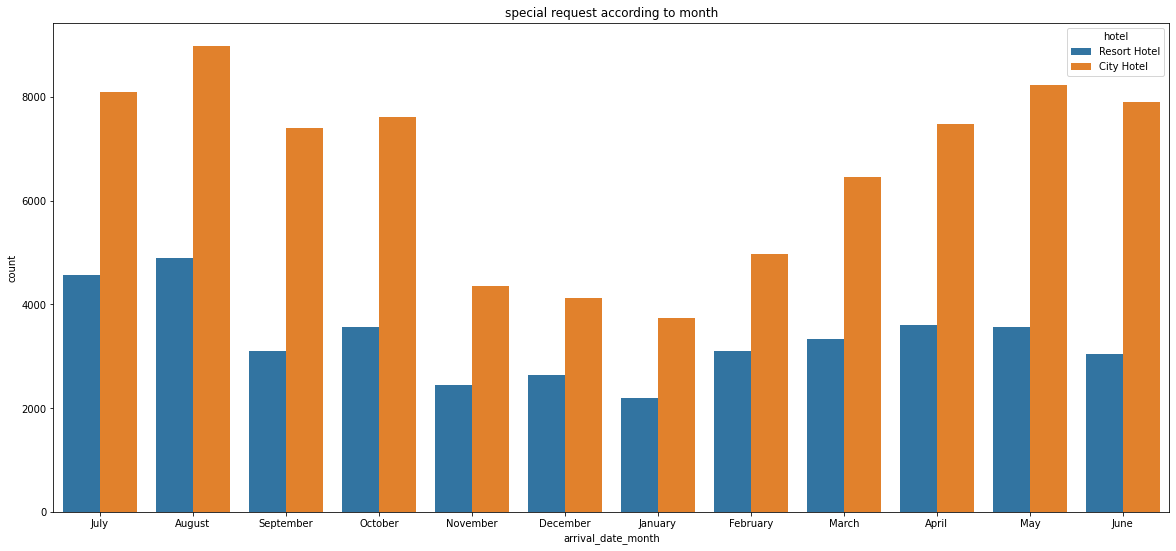

In [ ]:
plt.figure(figsize=(20,9))

sns.countplot(x=df['arrival_date_month'],hue=df['hotel'])
plt.title('special request according to month')

#Problem

##what is the precntage of cancellation in city hotel and resort hotel?

##Below countplot show the average percentage of cancelation in city hotel and resort hotel

Text(0, 0.5, 'Reservation Count')

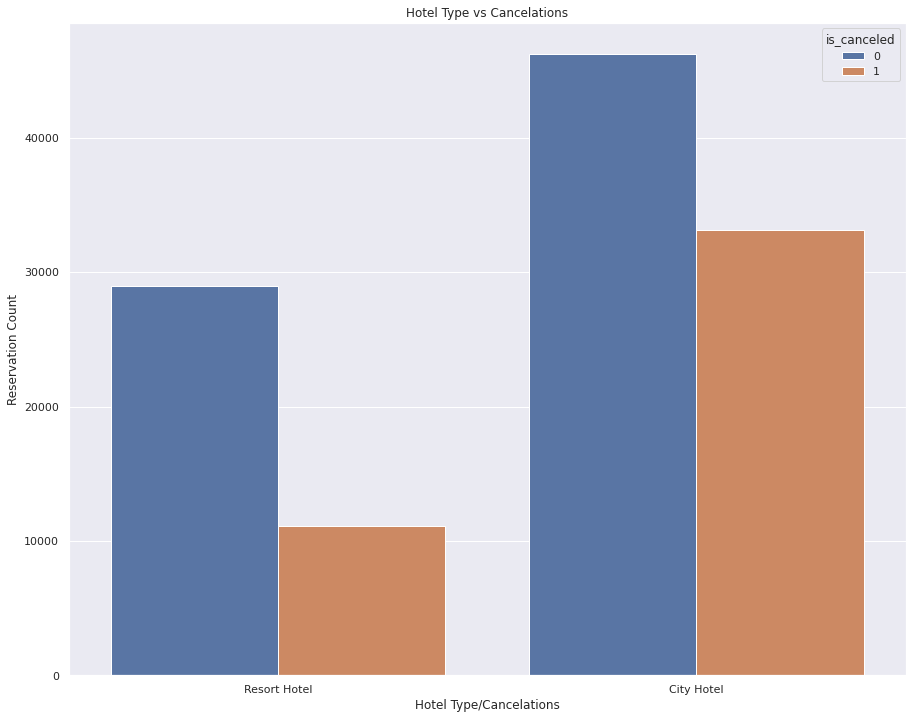

In [ ]:
#use countplot
sns.set(rc={'figure.figsize':(15,12)})
Hotel=sns.countplot(x='hotel',hue='is_canceled',data=df)
Hotel.set(title='Hotel Type vs Cancelations')
Hotel.set_xlabel("Hotel Type/Cancelations",fontsize=12)
Hotel.set_ylabel("Reservation Count",fontsize=12)

In [ ]:
from locale import normalize
df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

##Observation
these  countplot show that total 37% people were cenceled in booking city or resort hotel and 63% custmer not canceled in booking city and resort hotel

##What type of meal required in hotel?


###below countplot show the diffrent type of food is provided by hotel

Text(0, 0.5, 'Count')

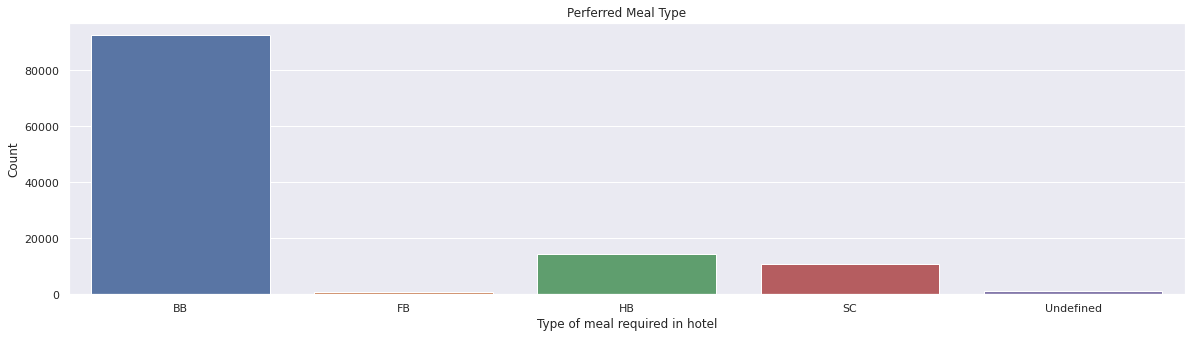

In [ ]:
#use countplot
plt.figure(figsize=(20,5))
sns.countplot(x=df['meal'])
plt.title('Perferred Meal Type')
plt.xlabel('Type of meal required in hotel')
plt.ylabel('Count')

In [ ]:
df['meal'].value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

above countplot show the diffrent type of meal in hotel and percentage of meal
##Type of meal
###BB(bead and breakfast)=77%
###FB(full board) breakfast+lunch+dinner+other meal=0.66%
###HB(half board) brekfast+diner  =12%
###SC(self catering)  = 8%
###undefied  = 1%

#Observation
##So the most preferred meal type by the gusets is :
# BB(bead and breakfast)


#Problem
##what is the customer that special reservation status ?


##below countplot  show that  customer reservation status in hotel

Text(0, 0.5, 'Reservation Count')

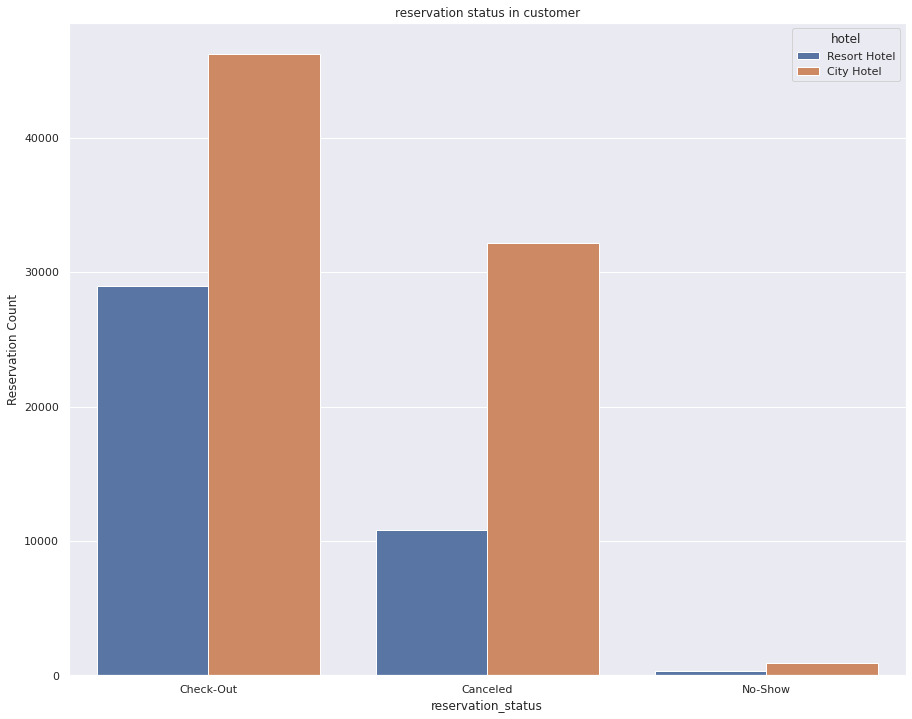

In [ ]:
#sns.countplot
sns.set(rc={'figure.figsize':(15,12)})
Resrvation=sns.countplot(x='reservation_status',hue='hotel',data=df)
Resrvation.set(title='reservation status in customer')
Resrvation.set_xlabel("reservation_status",fontsize=12)
Resrvation.set_ylabel("Reservation Count",fontsize=12)

In [ ]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

#Observaion
##63% customer has checked in but already departed
##36% booking was canceled by  the customer
#1% customer did not checkin and did inform the hotel was reson why

#Problem
##which adults higest reserving hotel room ?


##checking  the adult travel acount

Text(0, 0.5, ' Count')

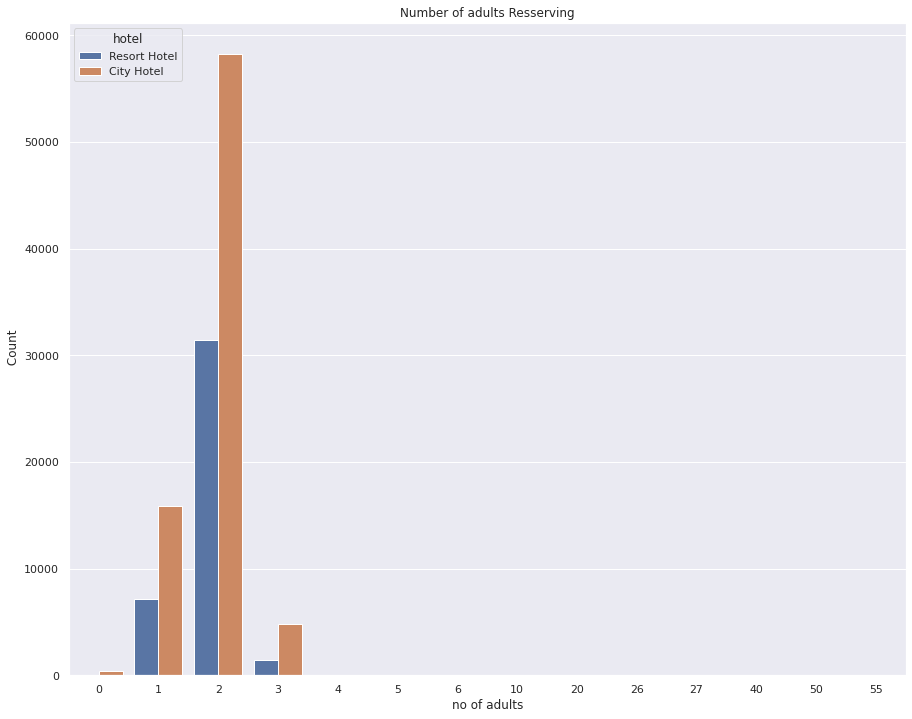

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
adult=sns.countplot(x='adults',hue='hotel',data=df)
adult.set(title='Number of adults Resserving')
adult.set_xlabel("no of adults",fontsize=12)
adult.set_ylabel(" Count",fontsize=12)

In [ ]:
df['adults'].value_counts(normalize=True)

2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
27    0.000017
20    0.000017
5     0.000017
40    0.000008
50    0.000008
55    0.000008
6     0.000008
10    0.000008
Name: adults, dtype: float64

#observation
##19% around booked as single room
##75% around booked as adults
##5% around booked as family room



##create a new column


In [ ]:
df['total_family'] = df['adults'] + df['children'] + df['babies']

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_as_numbers,total_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0


#

#Problem 
## How many family book room as couple, with single child or more than one child ?

Text(0, 0.5, 'Reservation Count')

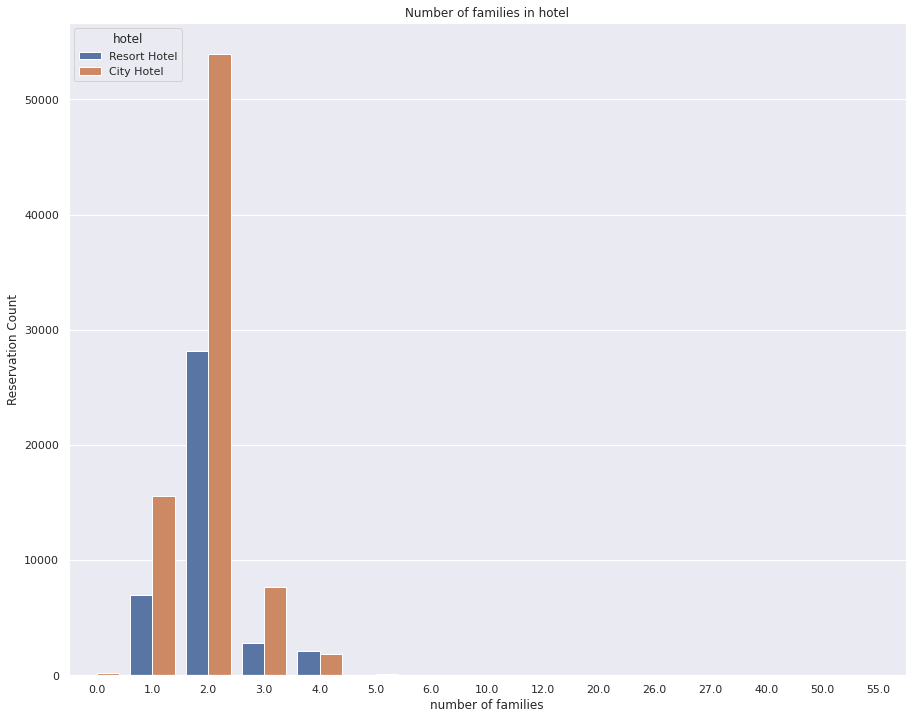

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
family=sns.countplot(x='total_family',hue='hotel',data=df)
family.set(title='Number of families in hotel')
family.set_xlabel("number of families",fontsize=12)
family.set_ylabel("Reservation Count",fontsize=12)

In [ ]:
df['total_family'].value_counts(normalize=True)

2.0     0.687249
1.0     0.189138
3.0     0.087906
4.0     0.032909
0.0     0.001508
5.0     0.001148
26.0    0.000042
12.0    0.000017
27.0    0.000017
20.0    0.000017
10.0    0.000017
40.0    0.000008
50.0    0.000008
55.0    0.000008
6.0     0.000008
Name: total_family, dtype: float64

observation
##68% couple family booking hotel room and 19% familis with 1 child and 9%family  with 2 children booking room and 2% more than 2 children family booking room

#Problem
##Hightest number of days customer stay in hotel ?

In [ ]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_as_numbers,total_family,total_stay,total_price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0,2,196.0


Text(0, 0.5, 'Count')

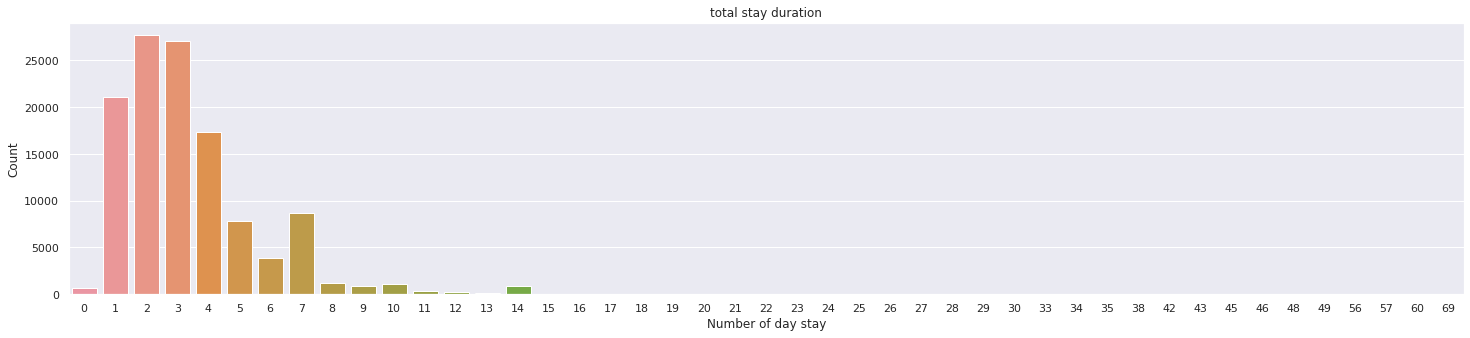

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['total_stay'])
plt.title('total stay duration')
plt.xlabel('Number of day stay')
plt.ylabel('Count')

In [ ]:
df['total_stay'].value_counts(normalize=True)

2     0.231537
3     0.226788
1     0.176055
4     0.145600
7     0.072494
5     0.065199
6     0.032306
8     0.009725
10    0.009540
14    0.007672
9     0.007044
0     0.005989
11    0.003317
12    0.001868
13    0.001189
15    0.000628
21    0.000595
16    0.000335
25    0.000310
18    0.000293
28    0.000293
19    0.000184
17    0.000168
29    0.000117
20    0.000117
22    0.000117
30    0.000109
23    0.000067
24    0.000050
26    0.000050
27    0.000042
35    0.000042
42    0.000034
33    0.000025
56    0.000017
34    0.000008
57    0.000008
49    0.000008
48    0.000008
69    0.000008
38    0.000008
45    0.000008
60    0.000008
46    0.000008
43    0.000008
Name: total_stay, dtype: float64

#Observation
#these graph show that the higehst customer book room for  2 days
##24% customer book room for 2 days 
##22% cusomer book room for 3  days
##17% customer book room for 1 days
##14% customer book room for 4 days
##8% customer book room for 7 days

#Problem 
##what is the optimal stay of lenght to get the best daily rate ?

In [ ]:
def total_price(total_stay,adr):
   total_price = 0
   if total_stay > 0:
     total_price = total_stay*adr
   return total_price  




In [ ]:
df['total_price'] = df.apply(lambda x: total_price(x['total_stay'], x['adr']),axis=1)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_as_numbers,total_family,total_stay,total_price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,7,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,7,1.0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,7,2.0,2,196.0


Text(0.5, 1.0, 'average hotel charges in day wise')

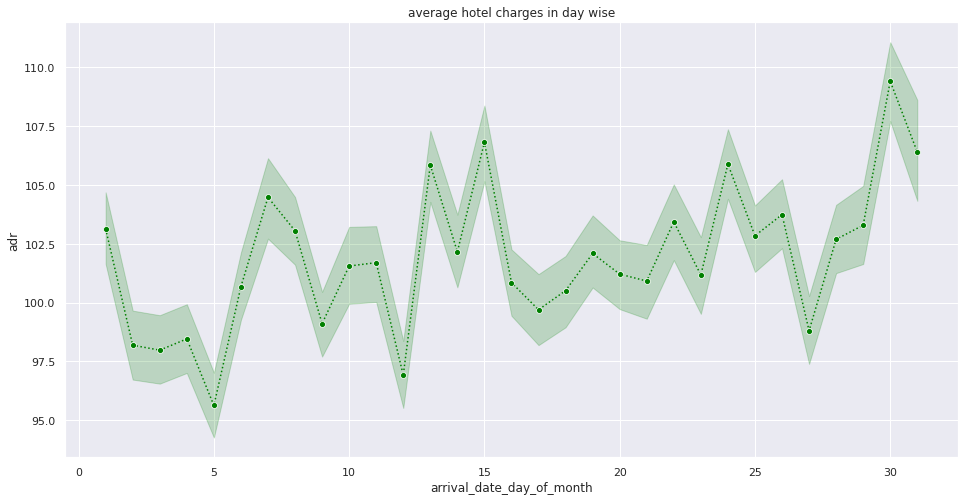

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='arrival_date_day_of_month',y='adr',data=df , color='green',
         marker='o',
         linestyle='dotted',)
plt.title('average hotel charges in day wise')

#Observation
##Above lineplot says that average daily rate  in arrival day of the month .
## cutsomer will get best rate if he stays 5 days in hotel 

#Problem
##what is the percentage distribution of required_car_parking_spaces ?

Text(0, 0.5, 'Count')

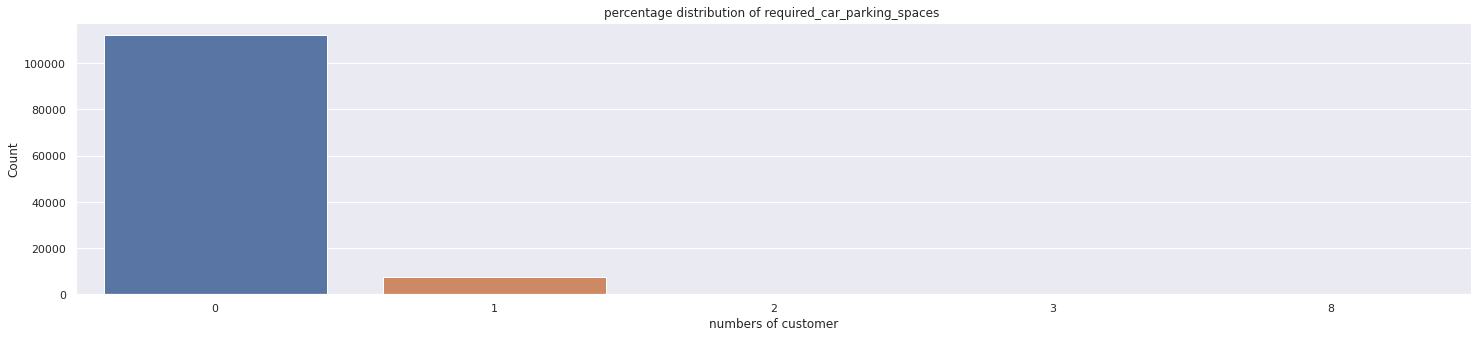

In [ ]:
# required_car_parking_spaces distribution
plt.figure(figsize=(25,5))
sns.countplot(x=df['required_car_parking_spaces'])
plt.title('percentage distribution of required_car_parking_spaces ')
plt.xlabel('numbers of customer')
plt.ylabel('Count')

In [ ]:
df['required_car_parking_spaces'].value_counts(normalize=True)


0    0.937884
1    0.061840
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

#observation
##93% cutomer did not required the parking space only 7% customer requried 1 parking spaces

#Problem
##Which Distribution channel is mostly used for hotel bookings?

Text(0, 0.5, 'Count')

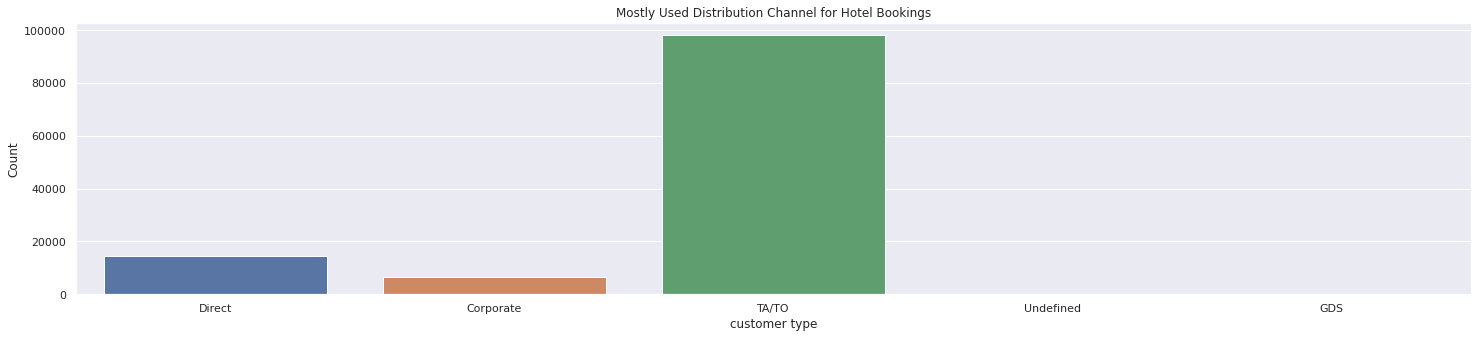

In [ ]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['distribution_channel'])
plt.title('Mostly Used Distribution Channel for Hotel Bookings')
plt.xlabel('customer type')
plt.ylabel('Count')

In [ ]:
df['distribution_channel'].value_counts(normalize=True)

TA/TO        0.819749
Direct       0.122666
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

#Observation


## TA & TO distribution_chanel  is mostly used for hotel booking
##82% TA&TO(Travel Agents,Tour opretors) 
##12% Direct booking
##5% corporate booking

#Problem
##Relationship between adr(average daily rate) and total_stay ?
 

In [ ]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

Text(0.5, 1.0, 'Relationship between  adr and total stay')

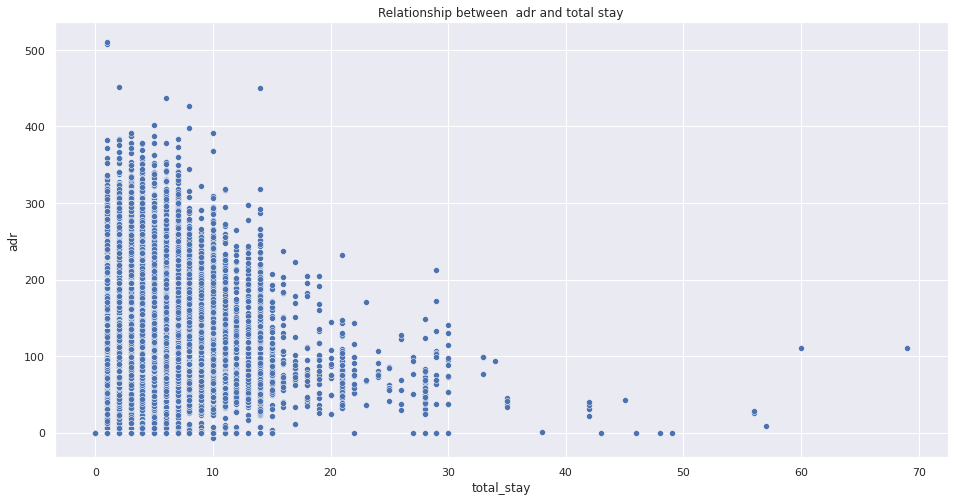

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['total_stay'],y=df['adr'])
plt.title('Relationship between  adr and total stay')

#Observation
##Above scatter plot show that if the number of days  for stays increase for customer then Adr(Average daily rate) decrease .
#Thus for longer stays customer get good adr 

#Problem
##Which agent did the most bookings ?

In [ ]:
## return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 
top_bookings=highest_bookings[:10]


Text(0.5, 1.0, 'Most Bookings Made by the agent')

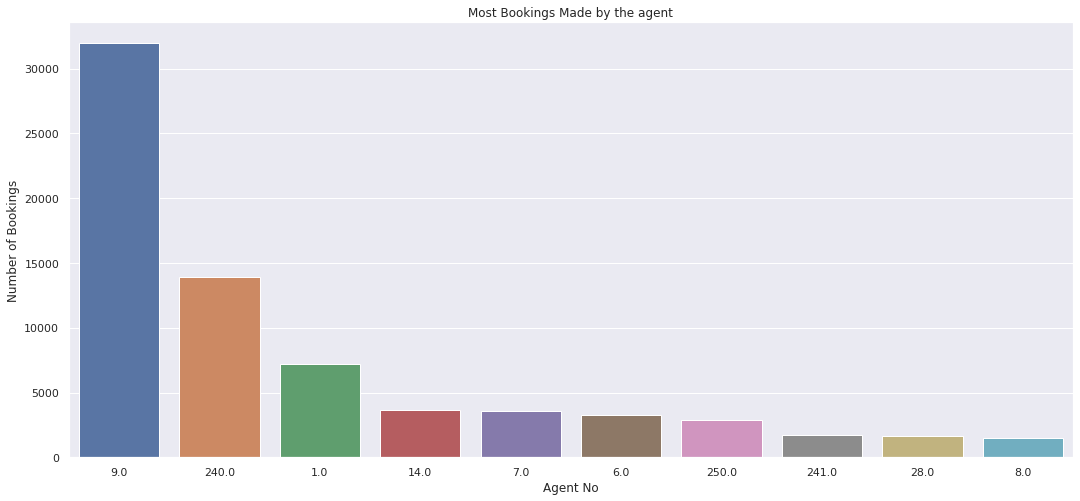

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_bookings['agent'],y=top_bookings['Most_Bookings'],order=top_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


In [ ]:
top_bookings

,agent,Most_Bookings
8,9.0,31961
173,240.0,13922
0,1.0,7191
13,14.0,3640
6,7.0,3539
5,6.0,3290
182,250.0,2870
174,241.0,1721
26,28.0,1666
7,8.0,1514


#Problem
##In which month hotel charges higher Adr ?

Text(0.5, 1.0, 'average hotel charges in month wise')

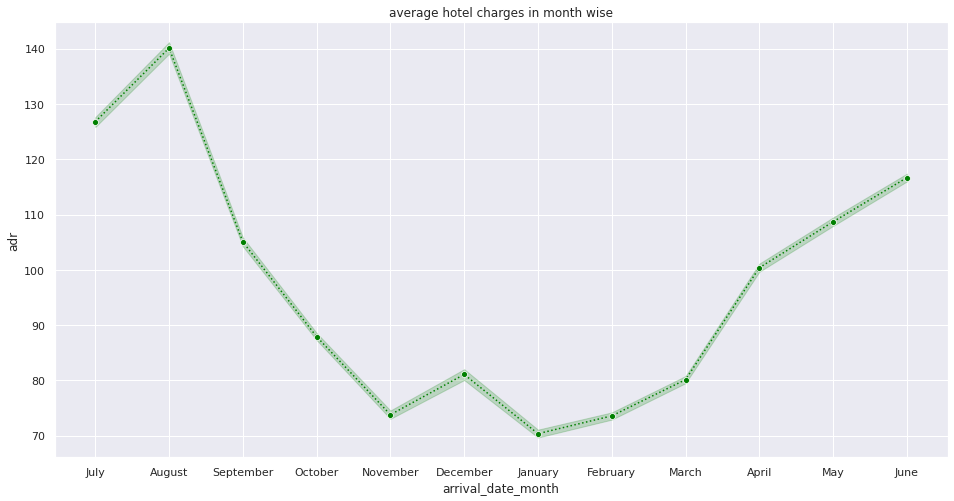

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='arrival_date_month',y='adr',data=df , color='green',
         marker='o',
         linestyle='dotted',)
plt.title('average hotel charges in month wise')

#Obsevation 
#Above line plot says that the highest hotel booking rate  is on august month 